<a href="https://colab.research.google.com/github/ShukrohBello/Machine-Learning-Zoomcamp/blob/main/03-classification/homework_03_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework: 03

### ML Zoomcamp - Classification

### Data preparation

> Dataset: wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

* Check if the missing values are presented in the features.
* If there are missing values:
* For categorical features, replace them with 'NA'
* For numerical features, replace with with 0.0

In [ ]:
# Import required modules.
import numpy as np
import pandas as pd
import seaborn as sns
# from zipfile import ZipFile
import matplotlib.pyplot as plt
# from sklearn.feature_extraction import DictVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mutual_info_score, accuracy_score
%matplotlib inline

In [ ]:
# Define the data source and download location.
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head(5)

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [ ]:
df.shape

(1462, 9)

In [ ]:
# Show the info of df_in.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [ ]:
# Check for missing values in df_in.
df.isna().sum()

,0
lead_source,128
industry,134
number_of_courses_viewed,0
annual_income,181
employment_status,100
location,63
interaction_count,0
lead_score,0
converted,0


In [ ]:
# # Subset the dataset.
# col_use = ['annual_income', 'lead_score']

# df = df[col_use]

In [ ]:
#Identify categorical and numerical columns
categorical_features = ['lead_source', 'industry', 'employment_status', 'location']
numerical_features = [ 'annual_income']

# Fill missing values
df[categorical_features] = df[categorical_features].fillna('NA')
df[numerical_features] = df[numerical_features].fillna(0.0)

In [ ]:
# Step 3: Verify there are no more missing values
print(df.isnull().sum())

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64


### Question 1

What is the most frequent observation (mode) for the column `industry`?

* NA
* technology
* healthcare
* retail

In [ ]:
# Find the mode for column 'industry'.
print(df['industry'].mode())

0    retail
Name: industry, dtype: object


#### Question 01 Answer: `retail`

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

* `interaction_count` and `lead_score`
* `number_of_courses_viewed` and `lead_score`
* `number_of_courses_viewed` and `interaction_count`
* `annual_income` and `interaction_count`
Only consider the pairs above when answering this question.

In [ ]:
# Select numerical data in df.
df_num = df.copy().select_dtypes(include='number')

In [ ]:
# Show the statistics of df_num.
df_num.describe()

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,2.031464,52472.172367,2.976744,0.506108,0.619015
std,1.449717,24254.347030,1.681564,0.288465,0.485795
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,44097.250000,2.000000,0.262500,0.000000
50%,2.000000,57449.500000,3.000000,0.510000,1.000000
75%,3.000000,68241.000000,4.000000,0.750000,1.000000
max,9.000000,109899.000000,11.000000,1.000000,1.000000


In [ ]:
# Show the correletions between all the columns.
df_num.corr()

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
number_of_courses_viewed,1.000000,0.009770,-0.023565,-0.004879,0.435914
annual_income,0.009770,1.000000,0.027036,0.015610,0.053131
interaction_count,-0.023565,0.027036,1.000000,0.009888,0.374573
lead_score,-0.004879,0.015610,0.009888,1.000000,0.193673
converted,0.435914,0.053131,0.374573,0.193673,1.000000


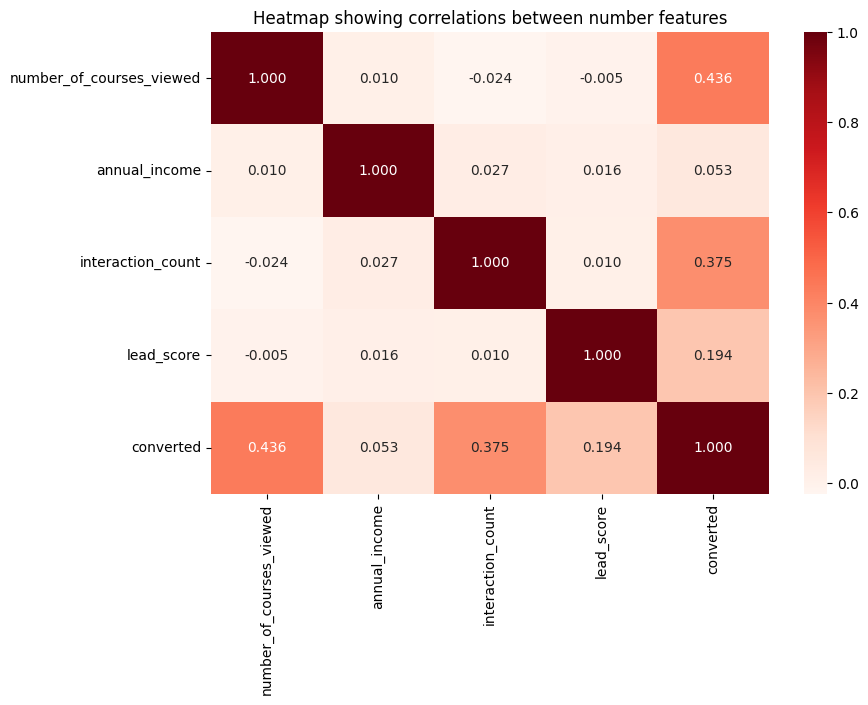

In [ ]:
# Draw the heatmap of the correlations.
plt.figure(figsize=(9, 6))
sns.heatmap(df_num.corr(), cmap="Reds", annot=True, fmt='.3f')
plt.title('Heatmap showing correlations between number features')
plt.show();

In [ ]:
# Unstack the correlation values.
df_unstack = df_num.corr().unstack().sort_values(ascending = False)
df_unstack

,,0
number_of_courses_viewed,number_of_courses_viewed,1.000000
annual_income,annual_income,1.000000
converted,converted,1.000000
lead_score,lead_score,1.000000
interaction_count,interaction_count,1.000000
converted,number_of_courses_viewed,0.435914
number_of_courses_viewed,converted,0.435914
interaction_count,converted,0.374573
converted,interaction_count,0.374573
lead_score,converted,0.193673


#### Question 02 Answer: `interaction_count and annual_income)`

### Target encoding

* Now we want to encode the `y` variable.
* Let's replace the values `yes`/`no` with `1`/`0`.

In [ ]:
# # Replace the values `yes`/`no` with `1`/`0` in column that requires target encoding.
# df = df.copy()
# df['column'] = df['column'].map({'yes': 1, 'no': 0})

In [ ]:
# # Show the head of df.
# df.head()

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
* Make sure that the target value converted is not in your dataframe.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
# Split df into train/val/test sets with 60%/20%/20% distribution.
SEED = 42

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

assert len(df) == (len(df_train) + len(df_val) + len(df_test))

In [ ]:
# Reset_index for y_train, y_val and y_test.
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
# Define y_train, y_val and y_test.
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [ ]:
# # Drop y from y_train, y_val and y_test.
# df_train = df_train.drop('converted', axis=1)
# df_val = df_val.drop('converted', axis=1)
# df_test = df_test.drop('converted', axis=1)

# assert 'y' not in df_train.columns
# assert 'y' not in df_val.columns
# assert 'y' not in df_test.columns

In [ ]:
del df_train["converted"]
del df_test["converted"]
del df_val["converted"]

### Question 3

* Calculate the mutual information score between `coverted` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?
  
* industry
* location
* lead_source
* employment_status

In [ ]:
# Define cal_mi function.
def cal_mi(series):
    return mutual_info_score(series, y_train)

In [ ]:
# List the categorical columns.
df_cat = df.copy().select_dtypes(exclude='number').columns
df_cat

Index(['lead_source', 'industry', 'employment_status', 'location'], dtype='object')

In [ ]:
# List the categorical columns.
cat_features = ['lead_source', 'industry', 'employment_status', 'location']

In [ ]:
# Calculate MI.
df_mi = df_train[cat_features].apply(cal_mi).round(2)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
lead_source,0.04
industry,0.01
employment_status,0.01
location,0.00


#### Question 03 Answer: `poutcome`

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

* 0.64
* 0.74
* 0.84
* 0.94

In [ ]:
# Derive X_train.
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [ ]:
# Fit X_train and y_train to model.
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [ ]:
# Derive X_val.
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [ ]:
# Obtain y_pred.
y_pred = model.predict(X_val)

In [ ]:
# Calculate accuracy.
accuracy = np.round(accuracy_score(y_val, y_pred), 2)
print(f'Accuracy = {accuracy}')

Accuracy = 0.7


#### Question 04 Answer: `0.7`

### Question 5

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

* 'industry'
* 'employment_status'
* 'lead_score'

> **Note**: The difference doesn't have to be positive.

In [ ]:
# List the featurea.
features = df_train.columns.to_list()
features

['lead_source',
 'industry',
 'number_of_courses_viewed',
 'annual_income',
 'employment_status',
 'location',
 'interaction_count',
 'lead_score']

In [ ]:
# Apply the feature elimination technique.
original_score = accuracy
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])
for feature in features:
    subset = features.copy()
    subset.remove(feature)

    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)

    scores.loc[len(scores)] = [feature, score, original_score - score]

In [ ]:
# Print the scores.
scores['difference'] = [abs(x) for x in scores['difference']]
scores

,eliminated_feature,accuracy,difference
0,lead_source,0.703072,0.003072
1,industry,0.699659,0.000341
2,number_of_courses_viewed,0.556314,0.143686
3,annual_income,0.853242,0.153242
4,employment_status,0.696246,0.003754
5,location,0.709898,0.009898
6,interaction_count,0.556314,0.143686
7,lead_score,0.706485,0.006485


In [ ]:
# Select the answer data.

ans_list = ['industry', 'employment_status', 'lead_score']
diff_val = [0.000341, 0.003754, 0.006485]

In [ ]:
# Find the least useful feature.
min_diff = min(diff_val)
min_diff

0.000341

#### Question 05 Answer:

### Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

* 0.01
* 0.1
* 1
* 10
* 100

> **Note**: If there are multiple options, select the smallest `C`.

In [ ]:
# Split df into train/val/test sets with 60%/20%/20% distribution.
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

assert len(df) == (len(df_train) + len(df_val) + len(df_test))

In [ ]:
# Reset_index for y_train, y_val and y_test.
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
# Define y_train, y_val and y_test.
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [ ]:
# Drop y from y_train, y_val and y_test.
del df_train["converted"]
del df_test["converted"]
del df_val["converted"]

In [ ]:
# Check the shapes of y_train and y_val.
y_train.shape, y_val.shape

((876,), (293,))

In [ ]:
# Derive X_train.
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [ ]:
# Derive X_val.
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [ ]:
# Train and output results.
scores = {}
for alpha in [0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(solver='liblinear', C=alpha, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    scores[alpha] = round(score, 3)
    print(f'alpha = {alpha}:\t RMSE = {score}')

alpha = 0.01:	 RMSE = 0.6996587030716723
alpha = 0.1:	 RMSE = 0.6996587030716723
alpha = 1:	 RMSE = 0.6996587030716723
alpha = 10:	 RMSE = 0.6996587030716723
alpha = 100:	 RMSE = 0.6996587030716723


In [ ]:
# Show the scores dictionary.
scores

{0.01: 0.7, 0.1: 0.7, 1: 0.7, 10: 0.7, 100: 0.7}

In [ ]:
# Print the smallest alpha with best accuracy.
print(f'The smallest `alpha` with the best accuracy is {max(scores, key=scores.get)}.')

The smallest `alpha` with the best accuracy is 0.01.


#### Question 06 Answer: `0.01`